## Working with Time Series

### Import Libraries

In [3]:
import pandas as pd
import numpy as np

#### Parsing Strings

In [4]:
xmas = pd.to_datetime("26th of December, 2024")
xmas

Timestamp('2024-12-26 00:00:00')

In [5]:
xmas.strftime('%A')

'Thursday'

What if we want to gather the dates for the 10 days prior to Christmas?

In [6]:
countdown = (xmas - pd.to_timedelta(np.arange(11), 'D')).sort_values()
countdown

DatetimeIndex(['2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-21', '2024-12-22', '2024-12-23',
               '2024-12-24', '2024-12-25', '2024-12-26'],
              dtype='datetime64[ns]', freq=None)

In [7]:
countdown.values

array(['2024-12-16T00:00:00.000000000', '2024-12-17T00:00:00.000000000',
       '2024-12-18T00:00:00.000000000', '2024-12-19T00:00:00.000000000',
       '2024-12-20T00:00:00.000000000', '2024-12-21T00:00:00.000000000',
       '2024-12-22T00:00:00.000000000', '2024-12-23T00:00:00.000000000',
       '2024-12-24T00:00:00.000000000', '2024-12-25T00:00:00.000000000',
       '2024-12-26T00:00:00.000000000'], dtype='datetime64[ns]')

#### Indexing by Time

In [8]:
index = pd.DatetimeIndex(countdown)

data = pd.Series(range(10, -1, -1), index=index)
data

2024-12-16    10
2024-12-17     9
2024-12-18     8
2024-12-19     7
2024-12-20     6
2024-12-21     5
2024-12-22     4
2024-12-23     3
2024-12-24     2
2024-12-25     1
2024-12-26     0
dtype: int64

In [9]:
data['2024-12-21':]

2024-12-21    5
2024-12-22    4
2024-12-23    3
2024-12-24    2
2024-12-25    1
2024-12-26    0
dtype: int64

In [10]:
data[data > 5]

2024-12-16    10
2024-12-17     9
2024-12-18     8
2024-12-19     7
2024-12-20     6
dtype: int64

#### Period Indexes

In [11]:
countdown.to_period('D')

PeriodIndex(['2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
             '2024-12-20', '2024-12-21', '2024-12-22', '2024-12-23',
             '2024-12-24', '2024-12-25', '2024-12-26'],
            dtype='period[D]')

In [12]:
countdown[-1]

Timestamp('2024-12-26 00:00:00')

In [13]:
countdown[-1] - countdown

TimedeltaIndex(['10 days',  '9 days',  '8 days',  '7 days',  '6 days',
                 '5 days',  '4 days',  '3 days',  '2 days',  '1 days',
                 '0 days'],
               dtype='timedelta64[ns]', freq=None)

#### Date Range

Treat this function similar to range but adapt it to dates

In [14]:
pd.date_range('2024-12-16', periods=10)

DatetimeIndex(['2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-21', '2024-12-22', '2024-12-23',
               '2024-12-24', '2024-12-25'],
              dtype='datetime64[ns]', freq='D')

In [15]:
pd.date_range('2024-12-25 19:00:00', periods=6, freq='H')

/tmp/ipykernel_5565/949590375.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range('2024-12-25 19:00:00', periods=6, freq='H')


DatetimeIndex(['2024-12-25 19:00:00', '2024-12-25 20:00:00',
               '2024-12-25 21:00:00', '2024-12-25 22:00:00',
               '2024-12-25 23:00:00', '2024-12-26 00:00:00'],
              dtype='datetime64[ns]', freq='h')

In [16]:
pd.period_range('2001-08', periods=12, freq="M")

PeriodIndex(['2001-08', '2001-09', '2001-10', '2001-11', '2001-12', '2002-01',
             '2002-02', '2002-03', '2002-04', '2002-05', '2002-06', '2002-07'],
            dtype='period[M]')

In [17]:
pd.timedelta_range(0, periods=15, freq="S")

/tmp/ipykernel_5565/3397916977.py:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  pd.timedelta_range(0, periods=15, freq="S")


TimedeltaIndex(['0 days 00:00:00', '0 days 00:00:01', '0 days 00:00:02',
                '0 days 00:00:03', '0 days 00:00:04', '0 days 00:00:05',
                '0 days 00:00:06', '0 days 00:00:07', '0 days 00:00:08',
                '0 days 00:00:09', '0 days 00:00:10', '0 days 00:00:11',
                '0 days 00:00:12', '0 days 00:00:13', '0 days 00:00:14'],
               dtype='timedelta64[ns]', freq='s')

In [21]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

/tmp/ipykernel_5565/107446932.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)


,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [ ]:
data.columns = ['South', 'West', 'East']
data['Total'] = data.eval('South + West + East')

In [24]:
data

,South,West,East,Total
Date,,,,
2012-10-02 13:00:00,55.0,7.0,48.0,110.0
2012-10-02 14:00:00,130.0,55.0,75.0,260.0
2012-10-02 15:00:00,152.0,81.0,71.0,304.0
2012-10-02 16:00:00,278.0,167.0,111.0,556.0
2012-10-02 17:00:00,563.0,393.0,170.0,1126.0
...,...,...,...,...
2024-11-30 19:00:00,69.0,14.0,55.0,138.0
2024-11-30 20:00:00,18.0,8.0,10.0,36.0
2024-11-30 21:00:00,49.0,15.0,34.0,98.0


In [25]:
data.dropna().describe()

,South,West,East,Total
count,106580.000000,106580.000000,106580.000000,106580.000000
mean,106.370473,45.537399,60.833074,212.740946
std,131.836319,59.330704,82.150163,263.672637
min,0.000000,0.000000,0.000000,0.000000
25%,13.000000,5.000000,7.000000,26.000000
50%,60.000000,26.000000,32.000000,120.000000
75%,146.000000,63.000000,80.000000,292.000000
max,1097.000000,667.000000,850.000000,2194.000000


In [31]:
%matplotlib inline
import seaborn; seaborn.set()
import matplotlib.pyplot as plt

In [44]:
data = data.drop('South', axis=1)

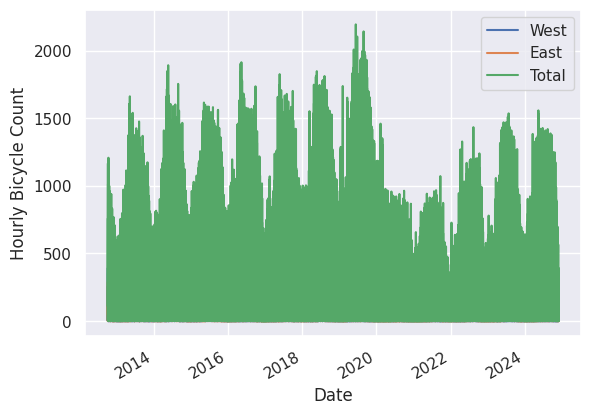

In [45]:
data.plot()
plt.ylabel("Hourly Bicycle Count");

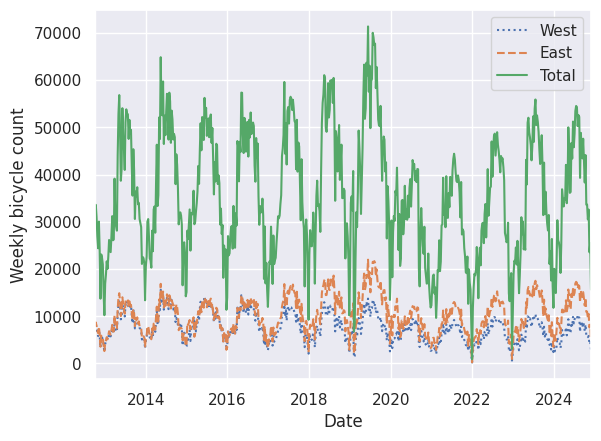

In [46]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

Text(0, 0.5, 'mean horly count')

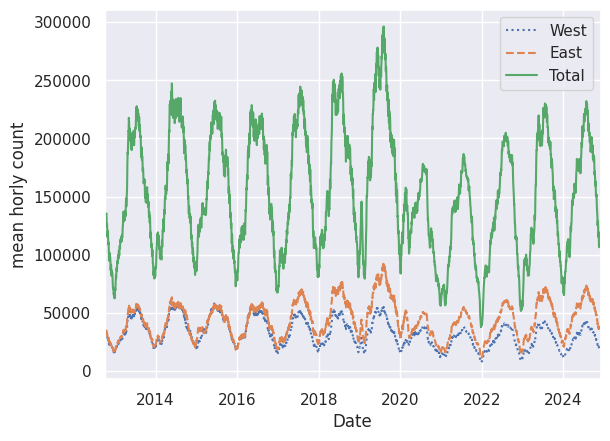

In [47]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean horly count')

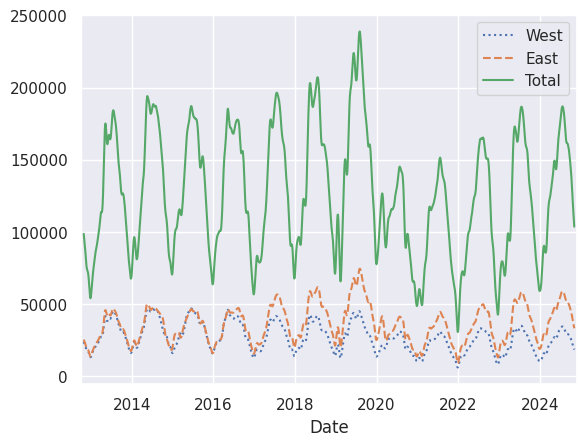

In [53]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

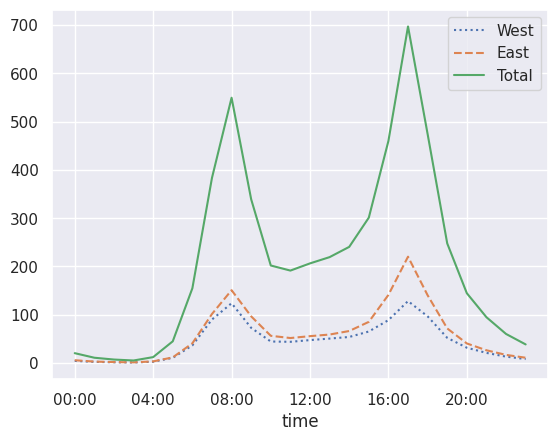

In [55]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

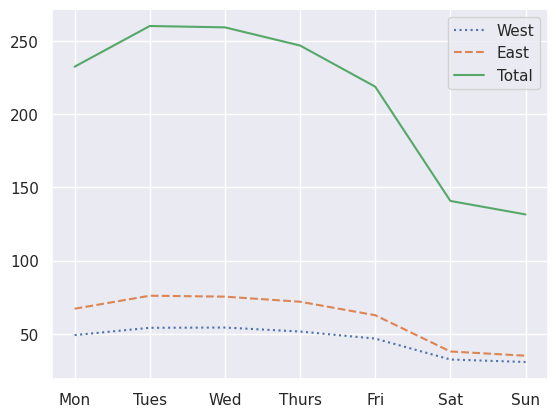

In [56]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

In [57]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

<Axes: title={'center': 'Weekends'}, xlabel='time'>

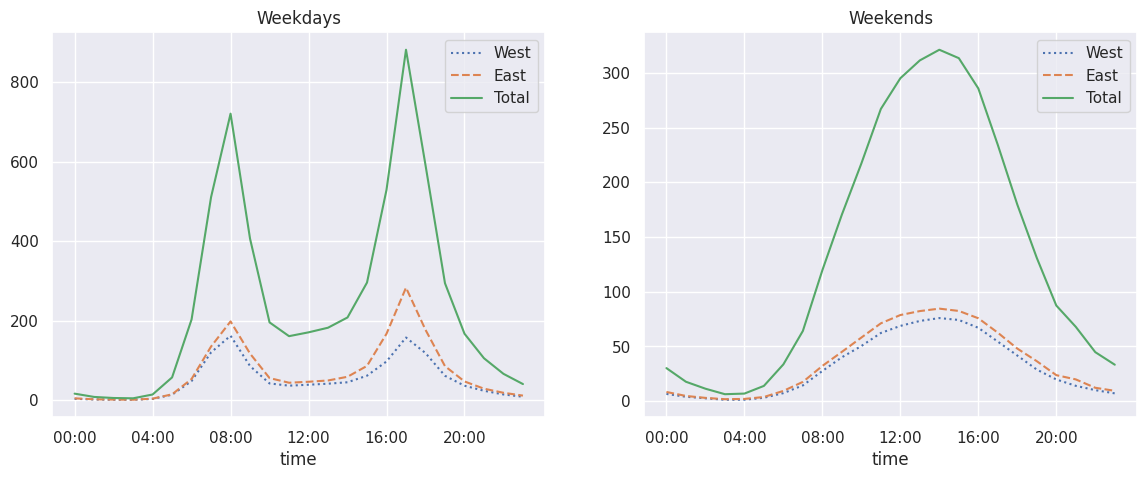

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-'])